In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [148]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [149]:
#loading data frm csv file to pandas dataframe
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [150]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [151]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [153]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [154]:
df.shape

(200, 5)

In [155]:
df.isnull().sum()
# no null value

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [156]:
df=df.drop(columns=['CustomerID'])

In [157]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [158]:
df.values

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72],
       ['Male', 67, 19, 14],
       ['Female', 35, 19, 99],
       ['Female', 58, 20, 15],
       ['Female', 24, 20, 77],
       ['Male', 37, 20, 13],
       ['Male', 22, 20, 79],
       ['Female', 35, 21, 35],
       ['Male', 20, 21, 66],
       ['Male', 52, 23, 29],
       ['Female', 35, 23, 98],
       ['Male', 35, 24, 35],
       ['Male', 25, 24, 73],
       ['Female', 46, 25, 5],
       ['Male', 31, 25, 73],
       ['Female', 54, 28, 14],
       ['Male', 29, 28, 82],
       ['Female', 45, 28, 32],
       ['Male', 35, 28, 61],
       ['Female', 40, 29, 31],
       ['Female', 23, 29, 87],
       ['Male', 60, 30, 4],
       ['Female', 21, 30, 73],
       ['Male', 53, 33, 4],
       ['Male

In [159]:
for col in df.columns:
    print(col, ': ', len(df[col].unique()))

Gender :  2
Age :  51
Annual Income (k$) :  64
Spending Score (1-100) :  84


In [160]:
#applying label encoding on Gender
from sklearn import preprocessing
label_encdr = preprocessing.LabelEncoder()

In [161]:
data=df
data['Gender']= label_encdr.fit_transform(data['Gender'])

In [162]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


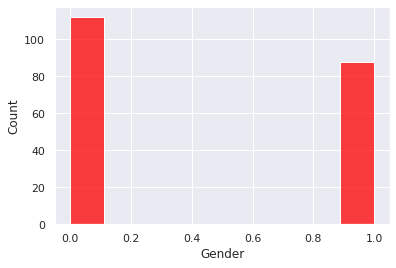

In [163]:
sns.histplot(data=data, x="Gender", color="red")

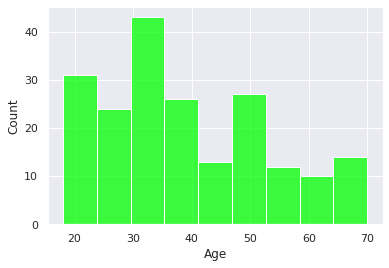

In [164]:
sns.histplot(data=data, x="Age", color="lime")

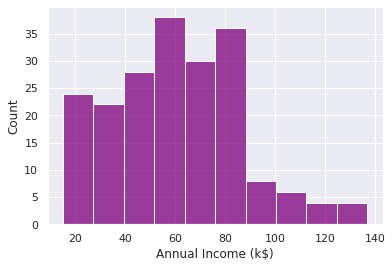

In [165]:
sns.histplot(data=data, x="Annual Income (k$)", color="purple")

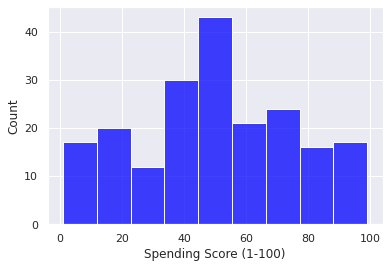

In [166]:
sns.histplot(data=data, x="Spending Score (1-100)", color="blue")

 From the histogram, we conclude that customers between class 40 and 50 have the highest spending score among all the classes.



###for detecting the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


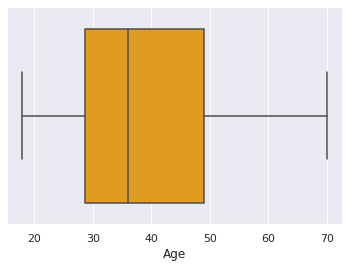

In [167]:
sns.boxplot(data.Age, color='orange')
# no outlier here

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


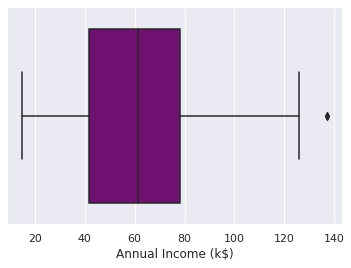

In [168]:
sns.boxplot(data['Annual Income (k$)'], color='purple')
# here is one outlier// it can affect the standardisation

 The average salary of all the customers is 62.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


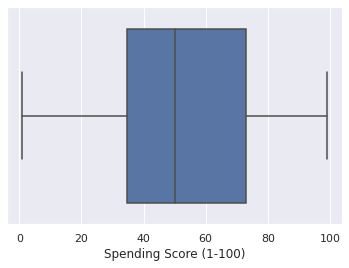

In [169]:
sns.boxplot(data['Spending Score (1-100)'])
# no outlier here

We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.

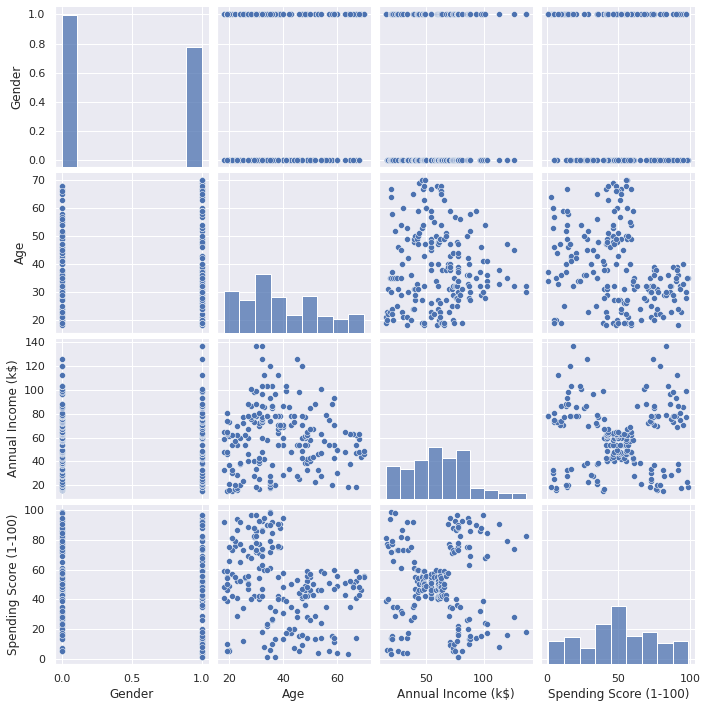

In [170]:
sns.pairplot(data)

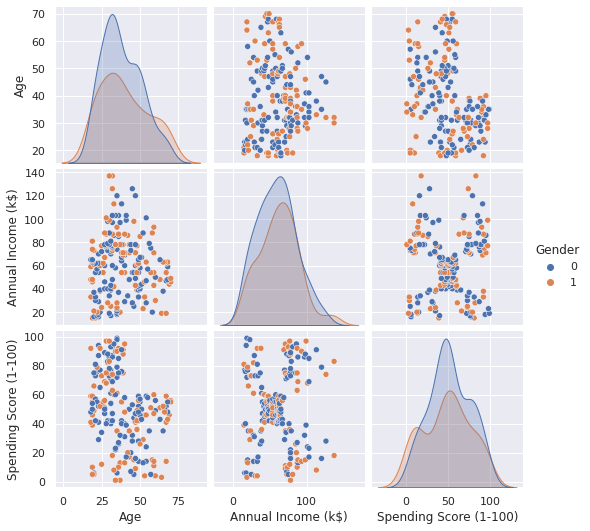

In [171]:
sns.pairplot(data, hue="Gender")

In [172]:
#correlation matrix
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


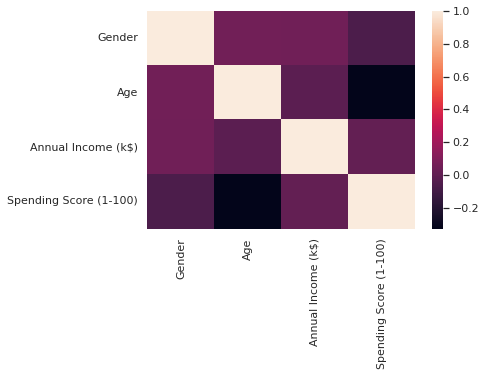

In [173]:
sns.heatmap(data.corr())

In [174]:
#calculate upper and lower limits 
upper_limit = data['Annual Income (k$)'].mean() + 3 * data['Annual Income (k$)'].std()
lower_limit = data['Annual Income (k$)'].mean() -3 * data['Annual Income (k$)'].std()

#from below observation no outliers to remove 

In [175]:
print(" upper limit for outlier in Annual Income = ",upper_limit )
print(" max of Annual Income =",data['Annual Income (k$)'].max())
print(" lower limit for outlier in Annual Income = ",lower_limit )
print(" min of Annual Income =",data['Annual Income (k$)'].min())


 upper limit for outlier in Annual Income =  139.35416349581374
 max of Annual Income = 137
 lower limit for outlier in Annual Income =  -18.234163495813732
 min of Annual Income = 15


In [176]:
#hence no outlier to remove
display(data[((data['Annual Income (k$)'] > upper_limit) & (data['Annual Income (k$)'] < lower_limit))])

,Gender,Age,Annual Income (k$),Spending Score (1-100)


#as there is no outlier in our data set, we can apply Standardization

In [177]:
data1=data

In [178]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
# transform train and test sets
scaled_data = scaler.transform(data)

In [179]:
print(scaled_data)

[[1.         0.01923077 0.         0.3877551 ]
 [1.         0.05769231 0.         0.81632653]
 [0.         0.03846154 0.00819672 0.05102041]
 [0.         0.09615385 0.00819672 0.7755102 ]
 [0.         0.25       0.01639344 0.39795918]
 [0.         0.07692308 0.01639344 0.76530612]
 [0.         0.32692308 0.02459016 0.05102041]
 [0.         0.09615385 0.02459016 0.94897959]
 [1.         0.88461538 0.03278689 0.02040816]
 [0.         0.23076923 0.03278689 0.7244898 ]
 [1.         0.94230769 0.03278689 0.13265306]
 [0.         0.32692308 0.03278689 1.        ]
 [0.         0.76923077 0.04098361 0.14285714]
 [0.         0.11538462 0.04098361 0.7755102 ]
 [1.         0.36538462 0.04098361 0.12244898]
 [1.         0.07692308 0.04098361 0.79591837]
 [0.         0.32692308 0.04918033 0.34693878]
 [1.         0.03846154 0.04918033 0.66326531]
 [1.         0.65384615 0.06557377 0.28571429]
 [0.         0.32692308 0.06557377 0.98979592]
 [1.         0.32692308 0.07377049 0.34693878]
 [1.         

In [180]:
scaled_data = pd.DataFrame(scaled_data, columns=data1.columns)

In [181]:
scaled_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [182]:
# scaled data's correlation matrix
scaled_data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


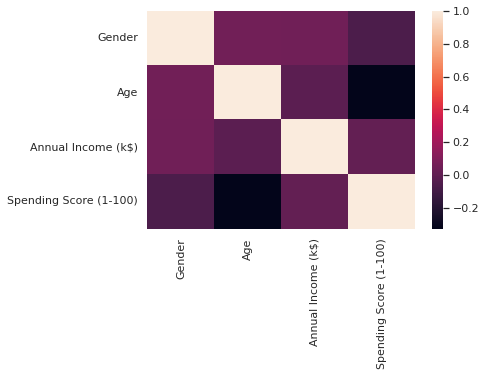

In [183]:
sns.heatmap(scaled_data.corr())

#from above observation
1. Age and Spending score are negatively correlated--age increases, spending decreases
2.Annual income and Spending score are positively correlated but very less

#analyzing based on Annual Income and Spending Score

In [184]:
x1=scaled_data[['Annual Income (k$)','Spending Score (1-100)']]

In [185]:
x1.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [186]:
x1=pd.DataFrame(x1).to_numpy()
x1

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

choosing no of cluster using wcss

In [187]:
# finding wcss value for different number of clusters for x1

wcss1 = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x1)

  wcss1.append(kmeans.inertia_)

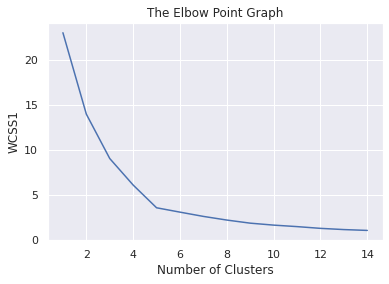

In [188]:
# plot an elbow graph

sns.set()
plt.plot(range(1,15), wcss1)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS1')
plt.show()

from above graph k=5 for x1 dataset
Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [189]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y1 = kmeans.fit_predict(x1)

print(Y1)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [190]:
from sklearn.metrics import silhouette_score

In [191]:
silhouette_score(x1,Y1)

0.5594854531227246

before clustring

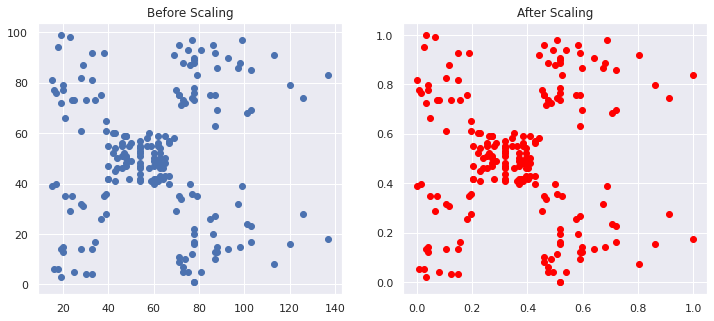

In [192]:
ig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scalinh
ax1.scatter(data1['Annual Income (k$)'], data1['Spending Score (1-100)'])
ax1.set_title("Before Scaling")
# after scaling
ax2.scatter(scaled_data['Annual Income (k$)'], scaled_data['Spending Score (1-100)'],color='red')
ax2.set_title("After Scaling")
plt.show()

after clustring

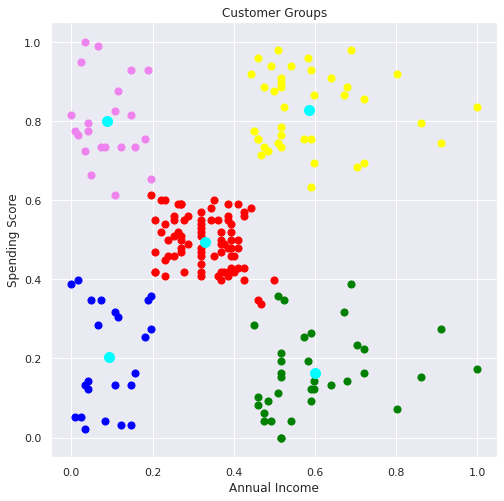

In [193]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x1[Y1==0,0], x1[Y1==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x1[Y1==1,0], x1[Y1==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x1[Y1==2,0], x1[Y1==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x1[Y1==3,0], x1[Y1==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x1[Y1==4,0], x1[Y1==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

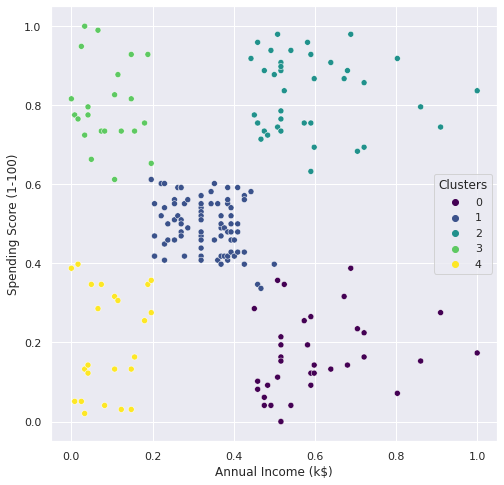

In [194]:
scaled_data['Clusters'] = Y1
plt.figure(figsize=(8,8))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",hue = 'Clusters',  data=scaled_data, palette='viridis')



Result of analysis based on Annual Income and Spending Score:

Cluster 0 : This cluster denotes the customer data with High Annual   Income and Low Spending Score.

Cluster 1 : This cluster denotes the customer data with Average Annual income and Average Spending score.

Cluster 2 : This cluster denotes the customer data with High Annual income and High Spending score.

Cluster 3 : This cluster denotes the customer data with Low Annual Income but High Spending Score.

Cluster 4 : This cluster denotes the customer data with Low Annual Income and Low Spending Score.

##-------------------------------------------------------------------------------------------------------------------------------------------##

#analyzing based on Age and Spending score

In [195]:
x2=scaled_data[['Age','Spending Score (1-100)']]
x2.head()

,Age,Spending Score (1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


choosing no. of cluster by using wcss

In [223]:
# finding wcss value for different number of clusters for x2

wcss2 = []

for i in range(1,15):
  kmeans2 = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans2.fit(x2)

  wcss2.append(kmeans2.inertia_)

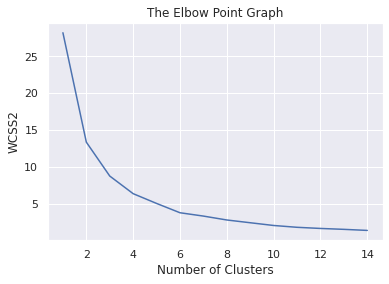

In [224]:
# plot an elbow graph

sns.set()
plt.plot(range(1,15), wcss2)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS2')
plt.show()


Training the k-Means Clustering Model

In [237]:
kmeans2 = KMeans(n_clusters=2, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y2 = kmeans2.fit_predict(x2)

print(Y2)

[1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [238]:
silhouette_score(x2,Y2)

0.47252865228696783

before clustring

After trying different k values, k=2 gives the best silhouette score

silhouette score is low because there is negative correlation between age and spending score

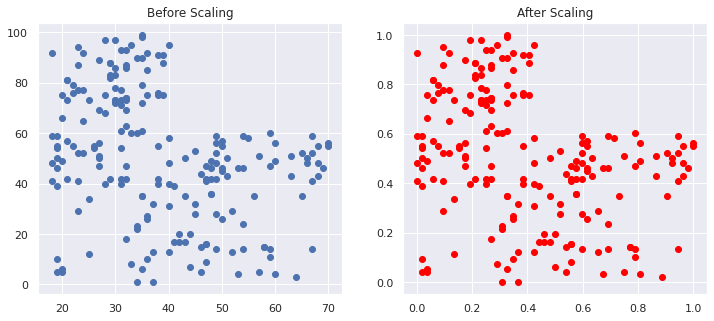

In [200]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scalinh
ax1.scatter(data1['Age'], data1['Spending Score (1-100)'])
ax1.set_title("Before Scaling")
# after scaling
ax2.scatter(scaled_data['Age'], scaled_data['Spending Score (1-100)'],color='red')
ax2.set_title("After Scaling")
plt.show()

after clustring

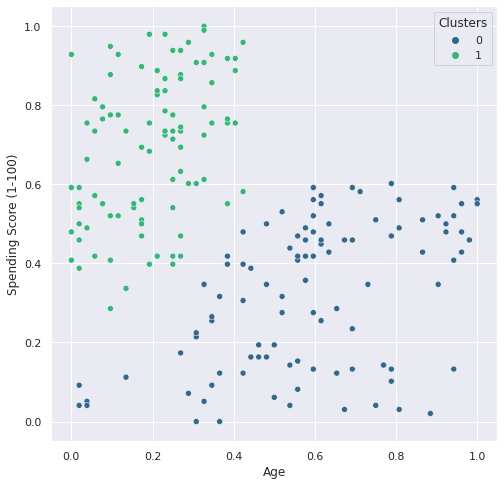

In [239]:
scaled_data['Clusters'] = Y2
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age",y="Spending Score (1-100)",hue = 'Clusters',  data=scaled_data,palette='viridis')


**Analysis of Age and Spending Score**

Clusteer 0: People having Age Above 40 have medium to lower spending score

Clusteer 1: People having Age less than 40 have medium to high spending score

#Analysis using HIERARCHICAL CLUSTERING

In [214]:
import scipy.cluster.hierarchy as shc  

##Analysing for Annual Inncome and Spending score

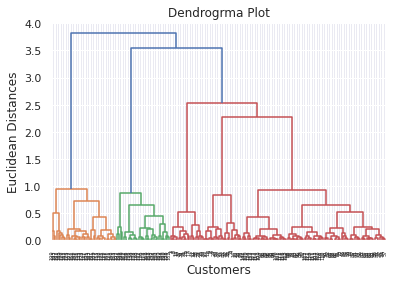

In [215]:
dendro = shc.dendrogram(shc.linkage(x1, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

The optimal number of clusters will be 5

In [208]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x1)  

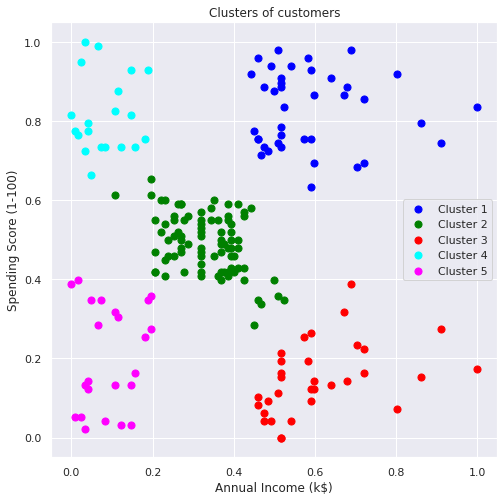

In [212]:
#visulaizing the clusters  
plt.figure(figsize=(8,8))

plt.scatter(x1[y_pred == 0, 0], x1[y_pred == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')  
plt.scatter(x1[y_pred == 1, 0], x1[y_pred == 1, 1], s = 50, c = 'green', label = 'Cluster 2')  
plt.scatter(x1[y_pred== 2, 0], x1[y_pred == 2, 1], s = 50, c = 'red', label = 'Cluster 3')  
plt.scatter(x1[y_pred == 3, 0], x1[y_pred == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x1[y_pred == 4, 0], x1[y_pred == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [241]:
silhouette_score(x1,y_pred)

0.5582698727196419

This is exactly same as k_means clustring

-------------------------------------------------------------------------------------------------------------------------------------------

##Analysing for Age and spending score

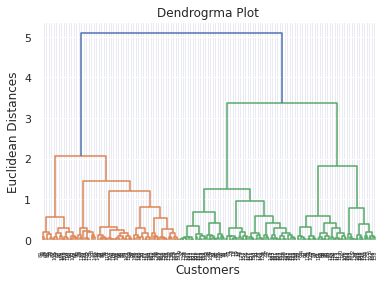

In [213]:
dendro2 = shc.dendrogram(shc.linkage(x2, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")
plt.show() 

The optimal number of clusters will be 2

In [221]:
clstr= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y2_pred= clstr.fit_predict(x2)

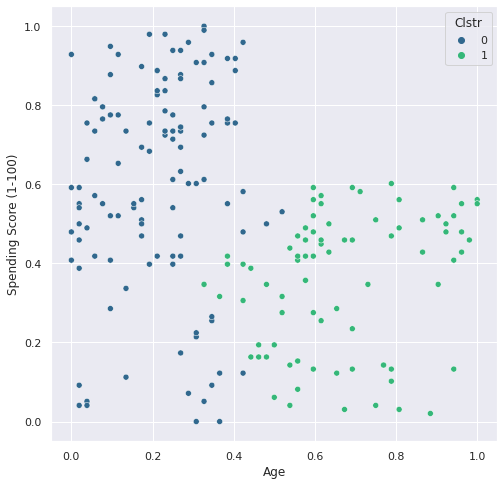

In [222]:
scaled_data['Clstr'] = y2_pred
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age",y="Spending Score (1-100)",hue = 'Clstr',  data=scaled_data, palette='viridis')

In [240]:
silhouette_score(x2,y2_pred)

0.41699937625242867

Cluster 0: People having age less than 40 have spending score ranging from low to high but more tilted toward high spending score

Cluster 1: People having age above 40 having spending score low to medium

#After analysing the Age vs Spending score of K-means and Hierarchical clustering, Ifound that K-mean cluster better as compared to Hierarchical